# This section aims to train machine learning classification model for the rows having candidate scores

In [1]:
import pandas as pd
df=pd.read_csv("../data_sources/analysis_ready_dataset/DataAnalysis.csv")

In [2]:
df["publishDate"]=pd.to_datetime(df["publishDate"])

## We first identify rows having at least one score and put a corresponding labels. (If there is more than 1 highest score, we put label randomly.)

In [3]:
import pandas as pd

# Assuming your dataframe is named 'df'
# The model aims to be trained with filtered_df
filtered_df = df[(df['KKscore'] != 0) | (df['RTEscore'] != 0) | (df['SOscore'] != 0) | (df['MIscore'] != 0)]
# after the model is trained we will check its performance on unlabeled data which we don't have any label provided at all.
df_toPredict=df[(df['KKscore'] == 0) & (df['RTEscore'] == 0) & (df['SOscore'] == 0) & (df['MIscore'] == 0)]

# Print the filtered dataframe



In [4]:
filtered_df

,channelName,video_title,sentence,publishDate,sentiment_score,KKscore,RTEscore,SOscore,MIscore
7,Cüneyt Özdemir,YILMAZ ÖZDİL SÖZCÜDEN NEDEN AYRILDI? #shorts,Bunlar da akp gibi olacak diye korkuyorum insa...,2023-03-08 11:24:50,1,1,0,0,0
12,Cüneyt Özdemir,KILIÇDAROĞLU'NUN 2. TUR STRATEJİSİ NE OLDU?,şuanda ali davutoğlunun keyfini hayal ediyorum...,2023-05-20 10:51:21,1,1,0,0,0
18,Cüneyt Özdemir,"JAHREIN, SİYASİ ATMOSFERİ NASIL DEĞERLENDİRİYOR?",Jahrein sen dürüst bir insan degilsin. Muharre...,2023-05-12 20:53:51,1,0,0,0,2
30,Cüneyt Özdemir,TOKİ BİNALARI NASIL AYAKTA KALDI?,Akıl bilim eğitim liyakat ahlak vicdan şart.zi...,2023-03-09 16:12:34,1,1,0,0,0
31,Cüneyt Özdemir,ANKETLERDE KİM ÖNDE? CÜNEYT ÖZDEMİR NE DEDİ NE...,Muharrem ince olmasaydı rte seçimi önde kazanı...,2023-04-27 06:41:06,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...
27975,BaBaLa TV,Mevzular Açık Mikrofon 11. Bölüm I Cumhurbaşka...,"Eeee konuş konuş git reisin elini, utandım",2023-05-26 07:11:39,1,0,1,0,0
27977,BaBaLa TV,Mevzular Açık Mikrofon Tanıtım I 10. Bölüm: Mu...,Yazık günah kılıçdaroğlu kişisel meseleye çevi...,2023-04-28 05:16:39,1,1,0,0,0
27980,BaBaLa TV,Kim Haklı | 5. Bölüm | İstanbul'da Taksi Sorun...,ben saat 13.00 den 21.00 a kadar aramadigim du...,2023-05-10 18:13:11,1,0,1,0,0
27992,BaBaLa TV,GAZİ,⛔️Sorun YSK: YSK Erdoğanı diktatör yapacak! An...,2023-03-22 16:17:27,1,0,1,0,0


In [5]:
import pandas as pd
import numpy as np





score_columns = ['KKscore', 'RTEscore', 'SOscore', 'MIscore']

filtered_df['max_score_column'] = filtered_df[score_columns].idxmax(axis=1)


mask_multiple_max = filtered_df[score_columns].eq(filtered_df[score_columns].max(axis=1), axis=0).sum(axis=1) > 1


filtered_df.loc[mask_multiple_max, 'candidateLabel'] = np.random.choice(filtered_df.loc[mask_multiple_max, 'max_score_column'], size=mask_multiple_max.sum())
filtered_df.loc[~mask_multiple_max, 'candidateLabel'] = filtered_df.loc[~mask_multiple_max, 'max_score_column']


filtered_df.drop('max_score_column', axis=1, inplace=True)


filtered_df



C:\Users\anil17\AppData\Local\Temp\ipykernel_6328\1001798004.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['max_score_column'] = filtered_df[score_columns].idxmax(axis=1)
C:\Users\anil17\AppData\Local\Temp\ipykernel_6328\1001798004.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[mask_multiple_max, 'candidateLabel'] = np.random.choice(filtered_df.loc[mask_multiple_max, 'max_score_column'], size=mask_multiple_max.sum())
C:\Users\anil17\AppData\Local\Temp\ipykernel_6328\

,channelName,video_title,sentence,publishDate,sentiment_score,KKscore,RTEscore,SOscore,MIscore,candidateLabel
7,Cüneyt Özdemir,YILMAZ ÖZDİL SÖZCÜDEN NEDEN AYRILDI? #shorts,Bunlar da akp gibi olacak diye korkuyorum insa...,2023-03-08 11:24:50,1,1,0,0,0,KKscore
12,Cüneyt Özdemir,KILIÇDAROĞLU'NUN 2. TUR STRATEJİSİ NE OLDU?,şuanda ali davutoğlunun keyfini hayal ediyorum...,2023-05-20 10:51:21,1,1,0,0,0,KKscore
18,Cüneyt Özdemir,"JAHREIN, SİYASİ ATMOSFERİ NASIL DEĞERLENDİRİYOR?",Jahrein sen dürüst bir insan degilsin. Muharre...,2023-05-12 20:53:51,1,0,0,0,2,MIscore
30,Cüneyt Özdemir,TOKİ BİNALARI NASIL AYAKTA KALDI?,Akıl bilim eğitim liyakat ahlak vicdan şart.zi...,2023-03-09 16:12:34,1,1,0,0,0,KKscore
31,Cüneyt Özdemir,ANKETLERDE KİM ÖNDE? CÜNEYT ÖZDEMİR NE DEDİ NE...,Muharrem ince olmasaydı rte seçimi önde kazanı...,2023-04-27 06:41:06,1,0,1,0,2,MIscore
...,...,...,...,...,...,...,...,...,...,...
27975,BaBaLa TV,Mevzular Açık Mikrofon 11. Bölüm I Cumhurbaşka...,"Eeee konuş konuş git reisin elini, utandım",2023-05-26 07:11:39,1,0,1,0,0,RTEscore
27977,BaBaLa TV,Mevzular Açık Mikrofon Tanıtım I 10. Bölüm: Mu...,Yazık günah kılıçdaroğlu kişisel meseleye çevi...,2023-04-28 05:16:39,1,1,0,0,0,KKscore
27980,BaBaLa TV,Kim Haklı | 5. Bölüm | İstanbul'da Taksi Sorun...,ben saat 13.00 den 21.00 a kadar aramadigim du...,2023-05-10 18:13:11,1,0,1,0,0,RTEscore
27992,BaBaLa TV,GAZİ,⛔️Sorun YSK: YSK Erdoğanı diktatör yapacak! An...,2023-03-22 16:17:27,1,0,1,0,0,RTEscore


In [6]:
filtered_df['candidateLabel'] = filtered_df['candidateLabel'].replace({
    'KKscore': 'Kemal Kılıçdaroğlu',
    'RTEscore': 'Recep Tayyip Erdoğan',
    'SOscore': 'Sinan Oğan',
    'MIscore': 'Muharrem İnce'
})


C:\Users\anil17\AppData\Local\Temp\ipykernel_6328\1391635442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['candidateLabel'] = filtered_df['candidateLabel'].replace({


# Now, filtered_df is ready to be trained

In [7]:
filtered_df


,channelName,video_title,sentence,publishDate,sentiment_score,KKscore,RTEscore,SOscore,MIscore,candidateLabel
7,Cüneyt Özdemir,YILMAZ ÖZDİL SÖZCÜDEN NEDEN AYRILDI? #shorts,Bunlar da akp gibi olacak diye korkuyorum insa...,2023-03-08 11:24:50,1,1,0,0,0,Kemal Kılıçdaroğlu
12,Cüneyt Özdemir,KILIÇDAROĞLU'NUN 2. TUR STRATEJİSİ NE OLDU?,şuanda ali davutoğlunun keyfini hayal ediyorum...,2023-05-20 10:51:21,1,1,0,0,0,Kemal Kılıçdaroğlu
18,Cüneyt Özdemir,"JAHREIN, SİYASİ ATMOSFERİ NASIL DEĞERLENDİRİYOR?",Jahrein sen dürüst bir insan degilsin. Muharre...,2023-05-12 20:53:51,1,0,0,0,2,Muharrem İnce
30,Cüneyt Özdemir,TOKİ BİNALARI NASIL AYAKTA KALDI?,Akıl bilim eğitim liyakat ahlak vicdan şart.zi...,2023-03-09 16:12:34,1,1,0,0,0,Kemal Kılıçdaroğlu
31,Cüneyt Özdemir,ANKETLERDE KİM ÖNDE? CÜNEYT ÖZDEMİR NE DEDİ NE...,Muharrem ince olmasaydı rte seçimi önde kazanı...,2023-04-27 06:41:06,1,0,1,0,2,Muharrem İnce
...,...,...,...,...,...,...,...,...,...,...
27975,BaBaLa TV,Mevzular Açık Mikrofon 11. Bölüm I Cumhurbaşka...,"Eeee konuş konuş git reisin elini, utandım",2023-05-26 07:11:39,1,0,1,0,0,Recep Tayyip Erdoğan
27977,BaBaLa TV,Mevzular Açık Mikrofon Tanıtım I 10. Bölüm: Mu...,Yazık günah kılıçdaroğlu kişisel meseleye çevi...,2023-04-28 05:16:39,1,1,0,0,0,Kemal Kılıçdaroğlu
27980,BaBaLa TV,Kim Haklı | 5. Bölüm | İstanbul'da Taksi Sorun...,ben saat 13.00 den 21.00 a kadar aramadigim du...,2023-05-10 18:13:11,1,0,1,0,0,Recep Tayyip Erdoğan
27992,BaBaLa TV,GAZİ,⛔️Sorun YSK: YSK Erdoğanı diktatör yapacak! An...,2023-03-22 16:17:27,1,0,1,0,0,Recep Tayyip Erdoğan


In [8]:
from sklearn.model_selection import train_test_split

# splitting the data into training and test sets
X = filtered_df['sentence']  
y = filtered_df['candidateLabel']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## We use TF-IDF Vectorizer in order for machine to deal with strings in our sentence column.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()


X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)


In [10]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train_features, y_train)


LogisticRegression()

## Performance Measure (P) of the model is as follows,

In [11]:
from sklearn.metrics import accuracy_score, f1_score


y_pred = model.predict(X_test_features)


accuracy = accuracy_score(y_test, y_pred)


f1 = f1_score(y_test, y_pred, average='weighted')


In [12]:
print("Accuracy: ",accuracy, " F1 score: ", f1)

Accuracy:  0.8542246982358404  F1 score:  0.8519897897718007


## Confusion matrix is also helpful to grasp the performance of the model visually

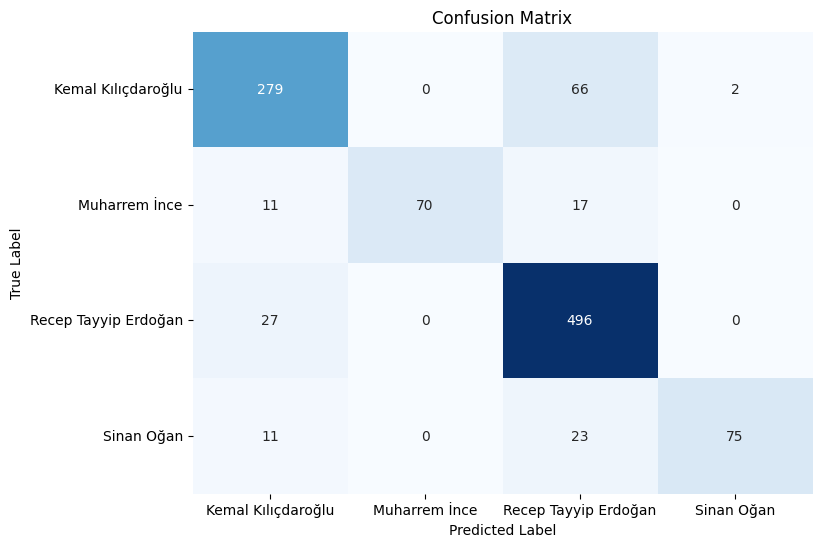

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# It is time for testing the model on rows having no scores at all. In this stage, after classification, we expect to do some sampling and review the model performance manually to our audience

In [14]:
df_toPredict

,channelName,video_title,sentence,publishDate,sentiment_score,KKscore,RTEscore,SOscore,MIscore
0,Cüneyt Özdemir,İSTANBUL DEPREME HAZIR MI? AFET YÖNETMEYİ NEDE...,Eskiden okul bahçelerinde deprem konteynerları...,2023-02-16 21:43:11,1,0,0,0,0
1,Cüneyt Özdemir,DEPREM BÖLGESİNDEKİ TEPKİLER NASIL DİNLENMELİ?...,"Yüreklerine, ellerine sağlık 🙏❤️Üzüldüğüm yine...",2023-02-17 07:45:10,1,0,0,0,0
2,Cüneyt Özdemir,"ÖLENLER ÖLDÜĞÜ İLE KALDI,YİNE ORTADA SORUMLU YOK!",devletin sorumluluk sınırı nerede akşam gidip ...,2023-03-17 05:51:40,1,0,0,0,0
3,Cüneyt Özdemir,YENİ BİR TÜRKİYE VAR! #cuneytozdemir #shorts #fyp,Be adam deprem hükümetin davasımı yoksa tüm ül...,2023-02-23 06:31:36,1,0,0,0,0
4,Cüneyt Özdemir,ÖZDAĞ'IN DESTEĞİ ZAFER GETİRECEK Mİ?,10:19 21 ve 24 anayasasının farklarına bakın l...,2023-05-24 17:40:48,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...
27994,BaBaLa TV,Mevzular Açık Mikrofon Tanıtım I 13. Bölüm: Tü...,Bence yılın en güzel programı gelecek gibi,2023-05-10 20:57:33,5,0,0,0,0
27996,BaBaLa TV,Mevzular Açık Mikrofon 11. Bölüm I Cumhurbaşka...,S,2023-05-25 21:41:09,4,0,0,0,0
27997,BaBaLa TV,Nasıl Unuturuz? Mevzular Açık Mikrofon Deprem ...,Hiç bir şey kolay değil dayanın abilerim karde...,2023-05-09 01:05:11,1,0,0,0,0
27998,BaBaLa TV,Mevzular Açık Mikrofon 10. Bölüm I Cumhurbaşka...,O avukat alattin çakiciyla gorusup 10 milyon d...,2023-05-23 17:15:34,1,0,0,0,0


In [15]:
df_toPredict['candidateLabel'] = 'None'

C:\Users\anil17\AppData\Local\Temp\ipykernel_6328\119291062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toPredict['candidateLabel'] = 'None'


In [16]:
df_toPredict

,channelName,video_title,sentence,publishDate,sentiment_score,KKscore,RTEscore,SOscore,MIscore,candidateLabel
0,Cüneyt Özdemir,İSTANBUL DEPREME HAZIR MI? AFET YÖNETMEYİ NEDE...,Eskiden okul bahçelerinde deprem konteynerları...,2023-02-16 21:43:11,1,0,0,0,0,None
1,Cüneyt Özdemir,DEPREM BÖLGESİNDEKİ TEPKİLER NASIL DİNLENMELİ?...,"Yüreklerine, ellerine sağlık 🙏❤️Üzüldüğüm yine...",2023-02-17 07:45:10,1,0,0,0,0,None
2,Cüneyt Özdemir,"ÖLENLER ÖLDÜĞÜ İLE KALDI,YİNE ORTADA SORUMLU YOK!",devletin sorumluluk sınırı nerede akşam gidip ...,2023-03-17 05:51:40,1,0,0,0,0,None
3,Cüneyt Özdemir,YENİ BİR TÜRKİYE VAR! #cuneytozdemir #shorts #fyp,Be adam deprem hükümetin davasımı yoksa tüm ül...,2023-02-23 06:31:36,1,0,0,0,0,None
4,Cüneyt Özdemir,ÖZDAĞ'IN DESTEĞİ ZAFER GETİRECEK Mİ?,10:19 21 ve 24 anayasasının farklarına bakın l...,2023-05-24 17:40:48,3,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...
27994,BaBaLa TV,Mevzular Açık Mikrofon Tanıtım I 13. Bölüm: Tü...,Bence yılın en güzel programı gelecek gibi,2023-05-10 20:57:33,5,0,0,0,0,None
27996,BaBaLa TV,Mevzular Açık Mikrofon 11. Bölüm I Cumhurbaşka...,S,2023-05-25 21:41:09,4,0,0,0,0,None
27997,BaBaLa TV,Nasıl Unuturuz? Mevzular Açık Mikrofon Deprem ...,Hiç bir şey kolay değil dayanın abilerim karde...,2023-05-09 01:05:11,1,0,0,0,0,None
27998,BaBaLa TV,Mevzular Açık Mikrofon 10. Bölüm I Cumhurbaşka...,O avukat alattin çakiciyla gorusup 10 milyon d...,2023-05-23 17:15:34,1,0,0,0,0,None


In [17]:
X_toPredict_features = vectorizer.transform(df_toPredict['sentence'])


In [18]:
y_pred_toPredict = model.predict(X_toPredict_features)


In [19]:
df_toPredict['candidateLabel'] = y_pred_toPredict


C:\Users\anil17\AppData\Local\Temp\ipykernel_6328\393051578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toPredict['candidateLabel'] = y_pred_toPredict


## Labels are ready. Let's do some sampling and see what the model has done.

,channelName,video_title,sentence,publishDate,sentiment_score,KKscore,RTEscore,SOscore,MIscore,candidateLabel
0,Cüneyt Özdemir,İSTANBUL DEPREME HAZIR MI? AFET YÖNETMEYİ NEDE...,Eskiden okul bahçelerinde deprem konteynerları...,2023-02-16 21:43:11,1,0,0,0,0,Recep Tayyip Erdoğan
1,Cüneyt Özdemir,DEPREM BÖLGESİNDEKİ TEPKİLER NASIL DİNLENMELİ?...,"Yüreklerine, ellerine sağlık 🙏❤️Üzüldüğüm yine...",2023-02-17 07:45:10,1,0,0,0,0,Recep Tayyip Erdoğan
2,Cüneyt Özdemir,"ÖLENLER ÖLDÜĞÜ İLE KALDI,YİNE ORTADA SORUMLU YOK!",devletin sorumluluk sınırı nerede akşam gidip ...,2023-03-17 05:51:40,1,0,0,0,0,Recep Tayyip Erdoğan
3,Cüneyt Özdemir,YENİ BİR TÜRKİYE VAR! #cuneytozdemir #shorts #fyp,Be adam deprem hükümetin davasımı yoksa tüm ül...,2023-02-23 06:31:36,1,0,0,0,0,Recep Tayyip Erdoğan
4,Cüneyt Özdemir,ÖZDAĞ'IN DESTEĞİ ZAFER GETİRECEK Mİ?,10:19 21 ve 24 anayasasının farklarına bakın l...,2023-05-24 17:40:48,3,0,0,0,0,Kemal Kılıçdaroğlu
...,...,...,...,...,...,...,...,...,...,...
27994,BaBaLa TV,Mevzular Açık Mikrofon Tanıtım I 13. Bölüm: Tü...,Bence yılın en güzel programı gelecek gibi,2023-05-10 20:57:33,5,0,0,0,0,Kemal Kılıçdaroğlu
27996,BaBaLa TV,Mevzular Açık Mikrofon 11. Bölüm I Cumhurbaşka...,S,2023-05-25 21:41:09,4,0,0,0,0,Recep Tayyip Erdoğan
27997,BaBaLa TV,Nasıl Unuturuz? Mevzular Açık Mikrofon Deprem ...,Hiç bir şey kolay değil dayanın abilerim karde...,2023-05-09 01:05:11,1,0,0,0,0,Recep Tayyip Erdoğan
27998,BaBaLa TV,Mevzular Açık Mikrofon 10. Bölüm I Cumhurbaşka...,O avukat alattin çakiciyla gorusup 10 milyon d...,2023-05-23 17:15:34,1,0,0,0,0,Recep Tayyip Erdoğan


In [223]:
df_toPredict["candidateLabel"].value_counts()

candidateLabel
Recep Tayyip Erdoğan    20354
Kemal Kılıçdaroğlu       2203
Muharrem İnce              47
Sinan Oğan                 14
Name: count, dtype: int64

In [250]:
testdf=df_toPredict[df_toPredict['sentence'].str.contains("hdp", case=False)]

In [251]:
testdf["candidateLabel"].value_counts()

candidateLabel
Kemal Kılıçdaroğlu      161
Recep Tayyip Erdoğan    138
Name: count, dtype: int64

In [228]:
testdf=df_toPredict[df_toPredict['sentence'].str.contains("din", case=False)]

In [229]:
testdf["candidateLabel"].value_counts()

candidateLabel
Recep Tayyip Erdoğan    2187
Kemal Kılıçdaroğlu       216
Muharrem İnce              1
Name: count, dtype: int64

In [21]:
df_toPredict[["sentence","video_title","candidateLabel"]].head(5)

,sentence,video_title,candidateLabel
0,Eskiden okul bahçelerinde deprem konteynerları...,İSTANBUL DEPREME HAZIR MI? AFET YÖNETMEYİ NEDE...,Recep Tayyip Erdoğan
1,"Yüreklerine, ellerine sağlık 🙏❤️Üzüldüğüm yine...",DEPREM BÖLGESİNDEKİ TEPKİLER NASIL DİNLENMELİ?...,Recep Tayyip Erdoğan
2,devletin sorumluluk sınırı nerede akşam gidip ...,"ÖLENLER ÖLDÜĞÜ İLE KALDI,YİNE ORTADA SORUMLU YOK!",Recep Tayyip Erdoğan
3,Be adam deprem hükümetin davasımı yoksa tüm ül...,YENİ BİR TÜRKİYE VAR! #cuneytozdemir #shorts #fyp,Recep Tayyip Erdoğan
4,10:19 21 ve 24 anayasasının farklarına bakın l...,ÖZDAĞ'IN DESTEĞİ ZAFER GETİRECEK Mİ?,Kemal Kılıçdaroğlu


## Sampling 10 rows for each candidate label to see some examples.

In [221]:
import random
import pandas as pd

labels = ['Kemal Kılıçdaroğlu', 'Recep Tayyip Erdoğan', 'Muharrem İnce', 'Sinan Oğan']
sampled_rows = []

# Sampling 10 rows 
for label in labels:
    label_rows = df_toPredict[df_toPredict['candidateLabel'] == label].sample(n=10, random_state=42)
    sampled_rows.append(label_rows)

sampled_df = pd.concat(sampled_rows)

for _, row in sampled_df.iterrows():
    print("Sentence:", row['sentence'])
    print("Predicted Label:", row['candidateLabel'])
    print()


Sentence: Aslan bacım benim yüreğine sağlık değişim şart yenilik şart 💛♥️🇹🇷🇹🇷 bilinçli bir seçmen örnek ablam
Predicted Label: Kemal Kılıçdaroğlu

Sentence: değişim muazzam
Predicted Label: Kemal Kılıçdaroğlu

Sentence: Ulke soyuluyoooooooorrrrrrrrrrt yeteeeeeeeeerrrrrrrrrtrr
Predicted Label: Kemal Kılıçdaroğlu

Sentence: KK'nın anlamadığı şey başlangıç seviyesindeki %30 oy oranına sahip AKP seçmeni twitter,youtube vb. platformlar kullanmıyor ve tek izledikleri Beyaz TV, ATV, A Haber. Bu seçmene kendini anlatacak bir yol bulması gerek aga bunları gönderecez, apoyu çıkarmayacağız diye.
Predicted Label: Kemal Kılıçdaroğlu

Sentence: Adam tam bir boş gazyağı tenekesi.. ne dediğini yok kendini adam yerine saymıyor.. başka adam mı var ki diyor. Oy kullanmıyor. Bir de küfür ediyor ağzı kenef....
Predicted Label: Kemal Kılıçdaroğlu

Sentence: İstifa istifa
Predicted Label: Kemal Kılıçdaroğlu

Sentence: o 2 amcaya şaşırıyorum bu kadar fosilin içinde nasıl yaşayabiliyorlar :))
Predicted Label: 